In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [15]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(autoload_with=engine)


In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)
stations = session.query(Station).all()
session.close()

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print("The most recent date in the dataset is", latest_date)

The most recent date in the dataset is 2017-08-23


Precipitation data from the previous 12 months:
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0


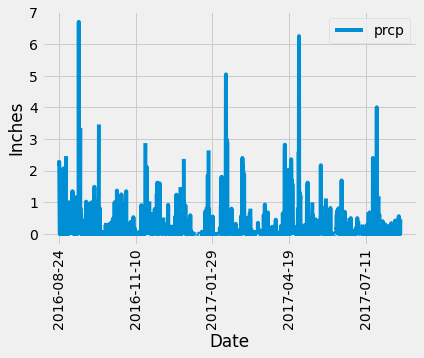

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
from datetime import datetime, timedelta

# Calculate the date one year from the last date in data set.
# Convert the latest date to a datetime object
latest_date_time = datetime.strptime(latest_date, '%Y-%m-%d')

# Calculate the date 12 months ago
one_year_ago = latest_date_time - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Print the results
print("Precipitation data from the previous 12 months:")
for date, prcp in precipitation_data:
    print(date, prcp)


# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Inches')
plt.show()



In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(df.describe())

              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).count()
print(f'There are {total_stations} stations in the dataset.')

There are 9 stations in the dataset.


In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()

for station, count in active_stations:
    print(f'{station}: {count}')

USC00519281: 2772
USC00519397: 2724
USC00513117: 2709
USC00519523: 2669
USC00516128: 2612
USC00514830: 2202
USC00511918: 1979
USC00517948: 1372
USC00518838: 511


In [31]:
# Using the most active station id from the previous query, calculate the lowest temperature.
active_station = active_stations[0][0]
results = session.query(func.min(Measurement.tobs)).\
            filter(Measurement.station == active_station).all()
print(f'The lowest temperature at station {active_station} are {results[0]}')

# Highest temperature 
results = session.query(func.max(Measurement.tobs)).\
            filter(Measurement.station == active_station).all()
print(f'The highest temperature at station {active_station} are {results[0]}')
# Average temperature
results = session.query(func.avg(Measurement.tobs)).\
            filter(Measurement.station == active_station).all()
print(f'The average temperature at station {active_station} are {results[0]}')

The lowest temperature at station USC00519281 are (54.0,)
The highest temperature at station USC00519281 are (85.0,)
The average temperature at station USC00519281 are (85.0,)


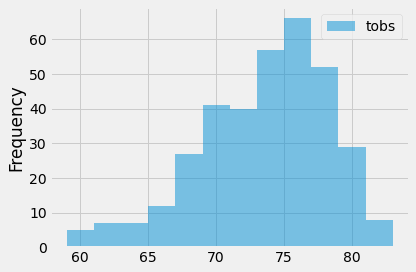

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
            filter(Measurement.station == active_station).\
            filter(Measurement.date >= one_year_ago).all()

df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12, alpha=0.5)
plt.tight_layout()
plt.show()

# Close session

In [ ]:
# Close Session
session.close()